#Classification algorithms  

The algorithms used-

Logistic\
Naive Bayes\
K-Nearest Neighbours




# Logistic Reg

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/datagdrive/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No missing values found.

In [ ]:
df.shape

(768, 9)

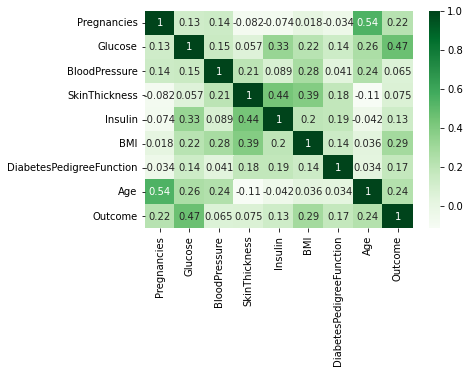

In [ ]:
sns.heatmap(df.corr(),cmap='Greens',annot=True)
plt.show()

Glucose being the most correlated to the outcome of Diabetes.

In [ ]:
x = df.drop(columns = 'Outcome')

y = df['Outcome']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)  

LogisticRegression()

In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[136,  16],
       [ 28,  51]])

In [ ]:
accuracy_score(y_test,y_pred)

0.8095238095238095

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=gnb.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[129,  23],
       [ 26,  53]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7878787878787878

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[136,  16],
       [ 28,  51]])

In [ ]:
accuracy_score(y_test,y_pred)

0.8095238095238095

# Clustering- K means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Using x as our main df as it does not contain target column 

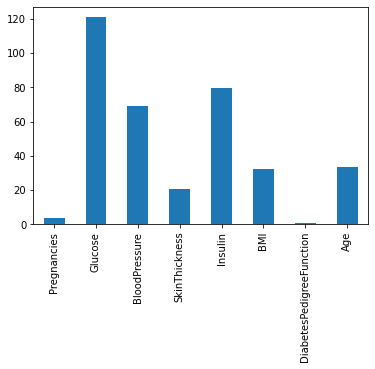

In [ ]:
x.mean().plot(kind='bar')

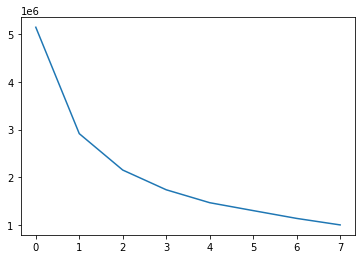

In [ ]:
ssd=[]
range_n_clusters=list(range(2,10))
for n in range_n_clusters:
  kmeans = KMeans(n_clusters=n,max_iter=50,random_state=0)
  kmeans.fit(x)
  ssd.append(kmeans.inertia_)

plt.plot(ssd)


Taking k=3

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=0)
label =kmeans.fit(x)

In [ ]:
arr=kmeans.labels_

In [ ]:
x['Cluster_id']=kmeans.labels_
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster_id
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,2
4,0,137,40,35,168,43.1,2.288,33,2


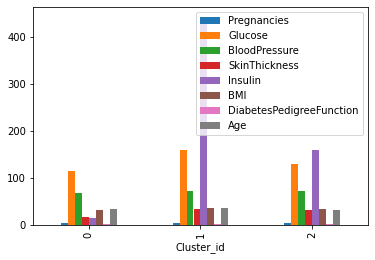

In [ ]:
x.groupby('Cluster_id').mean().plot(kind='bar')